# [Jabama](https://www.jabama.com/) website data analysis

I will analyze data generated from *Jabama.com*. As we can see from scrap notebook, *Data.csv* consists of 27 features. Running *1-Scrap.ipynb* notebook is necessary for this notebook.

## Why accommodation analysis
گردشگری یکی از صنعت های مهم و پول ساز در جهان است   https://www.iribnews.ir/files/fa/news/1398/7/3/3988519_761.pdf
ایران یکی از مقاصد گردشگری در خاورمیانه است  https://en.wikipedia.org/wiki/World_Tourism_rankings
ایران دارای تنوع فرهنگی و اقلیمی زیادی است
ایران کشور بزرگی است و می توان با رفتن به نقاط مختلف در یک زمان، انواع آب و هوا را تجربه کرد
میزان سفر داخلی و خارجی مخصوصا داخلی طی سالهای گذشته افزایش داشته است و همچنین متنوع تر شده است

https://www.amar.org.ir/%D8%AF%D8%A7%D8%AF%D9%87%D9%87%D8%A7-%D9%88-%D8%A7%D8%B7%D9%84%D8%A7%D8%B9%D8%A7%D8%AA-%D8%A2%D9%85%D8%A7%D8%B1%DB%8C/%D9%81%D8%B1%D9%87%D9%86%DA%AF-%D9%88%D8%B1%D8%B2%D8%B4-%D9%88-%DA%AF%D8%B1%D8%AF%D8%B4%DA%AF%D8%B1%DB%8C/%DA%AF%D8%B1%D8%AF%D8%B4%DA%AF%D8%B1%DB%8C#5686894--



## Why accommodation analysis
There are several main reasons for me to do this research. The most important ones are:
1.   According to the [World Economic Froum report in 2019](https://www.weforum.org/reports/the-travel-tourism-competitiveness-report-2019), Iran was the cheapest country for tourists in 2019 and it has remained one of the cheapest countries in recent years.
2.   Iran is also a safe country to travel, even safer than Russia, Egypt, India, Turkey, Brazil and Thailand. According to [World Economic Froum report in 2019](https://www.weforum.org/reports/the-travel-tourism-competitiveness-report-2019).
3.   

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from IPython.display import display

# !pip install Unidecode
from unidecode import unidecode

# !pip install arabic-reshaper
# !pip install python-bidi
from bidi.algorithm import get_display
from arabic_reshaper import reshape

## Load data
The input data is in *Data.csv*. I load it with *utf-8* encoding. Due to the way I searched the site for accommodations, many duplicated rows of data is generated, so I remove duplicates right after loading data. We can see the shape and sample rows of dataframe.

In [2]:
df = pd.read_csv('Data.csv', encoding="utf-8")  
df.drop_duplicates(subset =None, keep = 'first', inplace = True)
# df.reset_index()
df.shape

(2607, 27)

In [3]:
df.head()

,code,kind,price,comment,score,city,foundation,area,room,capacity,...,refrigerator,closet,cooking,oven,furniture,dining_table,restaurant,green_space,lobby,elavator
0,85775,inn,۲۳۰۰۰۰,۲۰,۴.۹,اردبیل- اردبیل,۰ متر زیربنا,۰ متر کل بنا,۰ اتاق,ظرفیت ۴ نفر,...,False,True,False,False,False,False,False,False,False,False
1,85779,inn,۱۸۰۰۰۰,۲۰,۴.۹,اردبیل- اردبیل,۰ متر زیربنا,۰ متر کل بنا,۰ اتاق,ظرفیت ۳ نفر,...,False,True,False,False,False,False,False,False,False,False
2,85754,inn,۱۴۰۰۰۰,۲۰,۴.۹,اردبیل- اردبیل,۰ متر زیربنا,۰ متر کل بنا,۰ اتاق,ظرفیت ۲ نفر,...,False,True,False,False,False,False,False,False,False,False
3,106714,villa,۱۰۷۰۰۰,۱,۴,اردبیل- اردبیل,۶۰ متر زیربنا,۱۱۰ متر کل بنا,۱ اتاق,ظرفیت تا ۱۰ نفر (۳ نفر پایه + تا ۷ نفر اضافه),...,False,False,False,True,True,False,False,False,False,False
4,89289,ecotourism,۵۷۰۰۰۰,۲,۳.۵,اردبیل- مشگین شهر,۰ متر زیربنا,۰ متر کل بنا,۰ اتاق,ظرفیت ۳ نفر,...,False,False,False,False,False,False,False,False,False,False


## Cleaning data
Because of the our data structures and *Farsi* characters, I have alot to do for cleaning data. The numeric data is located inside of a string phrase. For example the capacity number of accommodation is loctated inside of such a phrase : *ظرفیت تا ۱۰ نفر (۳ نفر پایه + تا ۷ نفر اضافه)*. 

I need to extract the numeric data from text and decode it, to obtain a usable data. Many features have this situation, some of them only need decoding, some of them need decoding and extraction. Therefore preparing data is a hard and time consuming process in this notebook. In addition to extraction and decoding, I set the type of all features so that I do not have any feature with object data type.

For this purpose, I will add some *temp* columns to dataframe for data separation. When this process ends, I remove those temparory columns.

I decide to add 3 new features to dataframe. The *capacity* feature contains 3 (*capacity*, *capacity_base* and *capacity_added*) features. The *city* feature also contains 2 (*city* and *province*) features. Lastly, our dataframe will consists of 30 features.

In [4]:
# int columns
df['price'] = pd.to_numeric(df.price.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['comment'] = pd.to_numeric(df.comment.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

# float column
df[['score','temp']] = df['score'].str.split('.',expand=True)
df['score'] = df['score'].replace(np.nan, '۰')
df['temp'] = df['temp'].replace(np.nan, '۰').astype(float)
df['score'] = pd.to_numeric(df.score.apply(unidecode), errors='coerce').astype(float)
df['score'] = df['score'] + (df['temp'] * 0.1)

# string columns
df['kind'] = df['kind'].astype(pd.StringDtype())

df[['room','temp1']] = df['room'].str.split('اتاق',expand=True)
df['room'] = pd.to_numeric(df.room.apply(unidecode), errors='coerce').astype(int)

df[['foundation','temp1']] = df['foundation'].str.split('متر زیربنا',expand=True)
df['foundation'] = pd.to_numeric(df.foundation.apply(unidecode), errors='coerce').astype(int)

df[['area','temp1']] = df['area'].str.split('متر کل بنا',expand=True)
df['area'] = pd.to_numeric(df.area.apply(unidecode), errors='coerce').astype(int)

df['double_bed'] = df['double_bed'].replace({'ندارد': '۰'}, regex=True)
df[['double_bed','temp1']] = df['double_bed'].str.split('تخت دو نفره',expand=True)
df['double_bed'] = pd.to_numeric(df.double_bed.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['single_bed'] = df['single_bed'].replace({'ندارد': '۰'}, regex=True)
df[['single_bed','temp1']] = df['single_bed'].str.split('تخت یک نفره',expand=True)
df['single_bed'] = pd.to_numeric(df.single_bed.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['iranian_bed'] = df['iranian_bed'].replace({'ندارد': '۰'}, regex=True)
df[['iranian_bed','temp1']] = df['iranian_bed'].str.split('رخت‌خواب سنتی',expand=True)
df['iranian_bed'] = pd.to_numeric(df.iranian_bed.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['toilet'] = df['toilet'].replace({'ندارد': '۰'}, regex=True)
df[['toilet','temp1']] = df['toilet'].str.split('سرویس بهداشتی',expand=True)
df['toilet'] = pd.to_numeric(df.toilet.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

df['bath'] = df['bath'].replace({'ندارد': '۰'}, regex=True)
df[['bath','temp1']] = df['bath'].str.split('حمام',expand=True)
df['bath'] = pd.to_numeric(df.bath.apply(unidecode), errors='coerce').replace(np.nan, 0).astype(int)

repl_dict ={ 
    'ظرفیت':'',
    'تا':'',
    'نفر':'',
    'پایه':'',
    'اضافه':''
}
df['capacity'] = df['capacity'].replace(repl_dict, regex=True)
df[['capacity','temp1']] = df['capacity'].str.split('(',expand=True)
df['temp1'] = df['temp1'].replace({'\)': ''}, regex=True)
df[['temp1','capacity_base']] = df['temp1'].str.split('+',expand=True)
df['capacity'] = pd.to_numeric(df.capacity.apply(unidecode), errors='coerce').astype(int)
df['capacity_base'] = df['capacity_base'].fillna('۰')
df['capacity_base'] = pd.to_numeric(df.capacity_base.apply(unidecode), errors='coerce').astype(int)
df['capacity_added'] = df['temp1'].fillna('۰')
df['capacity_added'] = pd.to_numeric(df.capacity_added.apply(unidecode), errors='coerce').astype(int)

df[['temp1','city']] = df['city'].str.split('-',expand=True).astype(pd.StringDtype())
df['city'] = df['temp1'].astype(pd.StringDtype())
df['province'] = df['temp1'].fillna('').astype(pd.StringDtype())
df['province'] = df['province'].str.strip()


As I said before, remove temparory columns and reorder the dataframe columns.

In [5]:
df.drop('temp', inplace=True, axis=1)
df.drop('temp1', inplace=True, axis=1)
df = df[['code','kind','price','comment','score','province','city','foundation','area','room','capacity_base','capacity_added'
         ,'capacity','double_bed','single_bed','iranian_bed','toilet','bath','water','water_cooler','refrigerator','closet'
         ,'cooking','oven','furniture','dining_table','restaurant','green_space','lobby','elavator']]

You can notice that data is extracted correctly and all 30 columns have correct, unique, non-null and decoded data. The head of data and column information are shown bellow.

In [6]:
df.head()

,code,kind,price,comment,score,province,city,foundation,area,room,...,refrigerator,closet,cooking,oven,furniture,dining_table,restaurant,green_space,lobby,elavator
0,85775,inn,230000,20,4.9,اردبیل,اردبیل,0,0,0,...,False,True,False,False,False,False,False,False,False,False
1,85779,inn,180000,20,4.9,اردبیل,اردبیل,0,0,0,...,False,True,False,False,False,False,False,False,False,False
2,85754,inn,140000,20,4.9,اردبیل,اردبیل,0,0,0,...,False,True,False,False,False,False,False,False,False,False
3,106714,villa,107000,1,4.0,اردبیل,اردبیل,60,110,1,...,False,False,False,True,True,False,False,False,False,False
4,89289,ecotourism,570000,2,3.5,اردبیل,اردبیل,0,0,0,...,False,False,False,False,False,False,False,False,False,False


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2607 entries, 0 to 5014
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   code            2607 non-null   int64  
 1   kind            2607 non-null   string 
 2   price           2607 non-null   int32  
 3   comment         2607 non-null   int32  
 4   score           2607 non-null   float64
 5   province        2607 non-null   string 
 6   city            2607 non-null   string 
 7   foundation      2607 non-null   int32  
 8   area            2607 non-null   int32  
 9   room            2607 non-null   int32  
 10  capacity_base   2607 non-null   int32  
 11  capacity_added  2607 non-null   int32  
 12  capacity        2607 non-null   int32  
 13  double_bed      2607 non-null   int32  
 14  single_bed      2607 non-null   int32  
 15  iranian_bed     2607 non-null   int32  
 16  toilet          2607 non-null   int32  
 17  bath            2607 non-null   i

In [8]:
df.groupby('province')[['price' , 'comment', 'score']].agg([np.min ,np.max, np.mean, np.var, 'count'])

price                                              \
                       amin      amax          mean           var count   
province                                                                  
آذربایجان شرقی       350000    450000  4.000000e+05  2.500000e+09     3   
آذربایجان غربی       500000    500000  5.000000e+05           NaN     1   
اردبیل               100000    950000  3.552632e+05  6.064232e+10    19   
اصفهان                 1000  30000000  6.144737e+05  3.634288e+12   266   
البرز                  1000   3000000  1.223690e+06  3.852111e+11    42   
بوشهر                560000    990000  7.300000e+05  2.980000e+10     5   
تهران                 70000  12500000  5.914524e+05  1.082783e+12   168   
خراسان جنوبی         220000    330000  3.025000e+05  2.117500e+09     6   
خراسان رضوی           38000    550000  1.690100e+05  1.147490e+10   100   
زنجان                110000    846000  5.850909e+05  5.341789e+10    11   
سمنان                 90000    680000  2.743750e+05  3.765068e+10    24   
فارس                  85000   3200000  5.509905e+05  4.782739e+11   105   
قزوین                330000    450000  3.766667e+05  4.133333e+09     3   
قم                    55000    170000  9.972222e+04  8.690359e+08    18   
مازندران               1000  20000000  6.621298e+05  8.595917e+11   709   
مرکزی                180000    315000  2.475000e+05  9.112500e+09     2   
هرمزگان                1000  10000000  8.166659e+05  7.310722e+11   458   
همدان                 80000    330000  2.070667e+05  5.434781e+09    15   
کردستان              100000   1475000  3.704545e+05  2.089773e+11    11   
کرمان                150000    360000  2.633333e+05  8.986667e+09     6   
کرمانشاه             100000   2000000  3.685625e+05  2.209728e+11    16   
کهگیلویه و بویراحمد  170000    170000  1.700000e+05           NaN     1   
گلستان                90000    750000  3.468657e+05  2.623700e+10    67   
گیلان                   300   3700000  4.470036e+05  2.280996e+11   361   
یزد                   75000  10000000  4.421474e+05  6.357574e+11   190   

                    comment                                  score       \
                       amin amax      mean         var count  amin amax   
province                                                                  
آذربایجان شرقی            0   10  3.666667   30.333333     3   0.0  4.1   
آذربایجان غربی            0    0  0.000000         NaN     1   0.0  0.0   
اردبیل                    0   20  6.000000   45.222222    19   0.0  4.9   
اصفهان                    0   37  3.650376   56.899943   266   0.0  5.0   
البرز                     0    9  0.690476    2.511614    42   0.0  5.0   
بوشهر                     0    0  0.000000    0.000000     5   0.0  0.0   
تهران                     0   83  5.452381  135.877958   168   0.0  5.0   
خراسان جنوبی              0    1  0.166667    0.166667     6   0.0  1.0   
خراسان رضوی               0   49  7.500000  200.353535   100   0.0  5.0   
زنجان                     0    1  0.090909    0.090909    11   0.0  5.0   
سمنان                     0    5  0.625000    1.114130    24   0.0  5.0   
فارس                      0   18  1.990476   15.951832   105   0.0  5.0   
قزوین                     0    0  0.000000    0.000000     3   0.0  0.0   
قم                        0   18  5.111111   47.516340    18   0.0  4.6   
مازندران                  0   32  1.201693   11.395703   709   0.0  5.0   
مرکزی                     0    0  0.000000    0.000000     2   0.0  0.0   
هرمزگان                   0   42  0.868996   15.457636   458   0.0  5.0   
همدان                     0   12  5.933333   34.780952    15   0.0  5.0   
کردستان                   0    0  0.000000    0.000000    11   0.0  0.0   
کرمان                     0    0  0.000000    0.000000     6   0.0  0.0   
کرمانشاه                  0    6  3.250000    2.600000    16   0.0  5.0   
کهگیلویه و بویراحمد       1    1  1.000000         NaN     1   4.2  4.2   
گلستان                    0    4  0.388060    

In [9]:
df.groupby('kind')[['price' , 'comment', 'score']].agg([np.min ,np.max, np.mean, np.var, 'count'])

price                                              comment       \
               amin      amax           mean           var count    amin amax   
kind                                                                            
apartment      1000  10000000  713993.362832  4.855807e+11   452       0   24   
carvansara   280000    800000  457222.222222  3.361944e+10     9       0    0   
complex        1000  10000000  642709.090909  7.337890e+11   220       0   49   
cottage         300   4000000  509589.864865  1.764880e+11   148       0    9   
ecotourism    30000   3000000  370653.444676  1.225295e+11   479       0   11   
hostel        65000    520000  219190.476190  1.604466e+10    21       0   32   
inn           40000    770000  203939.393939  1.571567e+10   231       0   83   
suite          1000   2000000  378010.344828  7.783374e+10   290       0   23   
traditional    1000   6600000  603008.583691  3.773594e+11   233       0   28   
villa          1000  30000000  998496.183206  3.266267e+12   524       0   22   

                                        score                                 
                 mean         var count  amin amax      mean       var count  
kind                                                                          
apartment    0.546460    3.658591   452   0.0  5.0  0.688496  2.345810   452  
carvansara   0.000000    0.000000     9   0.0  0.0  0.000000  0.000000     9  
complex      5.686364  126.033603   220   0.0  5.0  2.131364  4.234674   220  
cottage      0.601351    2.336597   148   0.0  5.0  0.982432  3.288669   148  
ecotourism   0.551148    2.616102   479   0.0  5.0  0.872025  3.098630   479  
hostel       2.238095   49.290476    21   0.0  5.0  1.395238  5.120476    21  
inn          7.108225  147.862149   231   0.0  5.0  2.079221  4.305219   231  
suite        1.620690   11.191266   290   0.0  5.0  1.474483  4.069796   290  
traditional  2.128755   21.888523   233   0.0  5.0  1.352790  4.057762   233  
villa        1.188931    8.295021   524   0.0  5.0  1.302672  3.843779   524

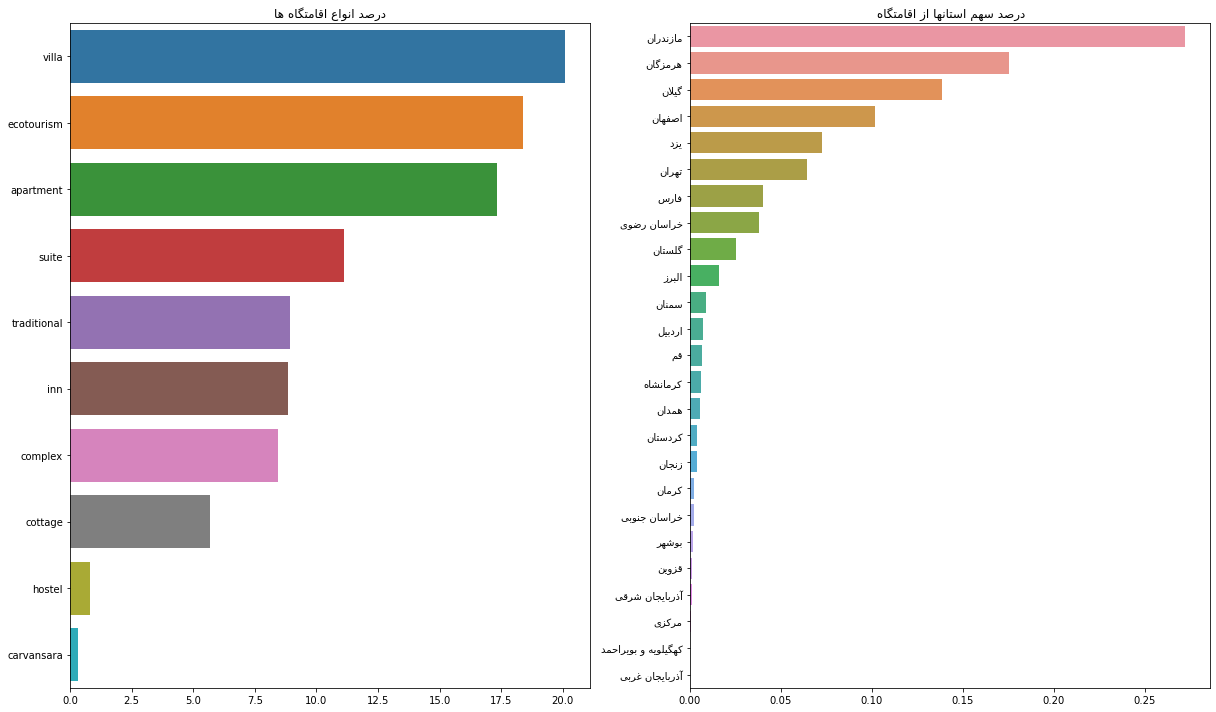

In [10]:
fig , axes = plt.subplots(1,2,figsize = (17, 10))

x_labels = df['kind'].value_counts(sort = True , normalize = True).index.tolist()
y_labels = df['kind'].value_counts(sort = True , normalize = True).tolist()
y_labels = [element * 100 for element in y_labels]
persian_labels = [get_display(reshape(label)) for label in x_labels]
data = {'kind':persian_labels, 'percentage':y_labels, 'kind_name':x_labels}
df_temp_kind = pd.DataFrame(data)
g1 = sns.barplot(y="kind", x="percentage", data=df_temp_kind, ax=axes[0])
g1.set(title=get_display(reshape('درصد انواع اقامتگاه ها')))
g1.set(xlabel=None)
g1.set(ylabel=None)


x_labels = df['province'].value_counts(sort = True , normalize = True).index.tolist()
y_labels = df['province'].value_counts(sort = True , normalize = True).tolist()\
y_labels = [element * 100 for element in y_labels]
persian_labels = [get_display(reshape(label)) for label in x_labels]
data = {'province':persian_labels, 'percentage':y_labels, 'province_name':x_labels}
df_temp_province = pd.DataFrame(data)
g2 = sns.barplot(y="province", x="percentage", data=df_temp_province, ax=axes[1])
g2.set(title=get_display(reshape('درصد سهم استانها از اقامتگاه ')))
g2.set(xlabel=None)
g2.set(ylabel=None)

plt.tight_layout()
plt.show()

In [11]:
display(df_temp_province[['province_name','percentage']].head(6))
display(df_temp_kind[['kind_name','percentage']].head(6))

,province_name,percentage
0,مازندران,0.271960
1,هرمزگان,0.175681
2,گیلان,0.138473
3,اصفهان,0.102033
4,یزد,0.072881
5,تهران,0.064442


,kind_name,percentage
0,villa,20.099731
1,ecotourism,18.373610
2,apartment,17.337936
3,suite,11.123897
4,traditional,8.937476
5,inn,8.860759


In [12]:
# plt.figure(figsize= (10, 7))
# sns.kdeplot(x = "price", hue = "province", fill= True,data = df_temp_province[df_temp_province['kind'] == 'villa']
#             , palette= "tab10")
# plt.title("Distribution of Attack", fontsize = 15)
# plt.ylabel("Frequency")
# plt.show()